[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/laurenzberger/Machine-Learning-Engineer-Nanodegree/blob/master/boston_housing/boston_housing.ipynb)

# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [1]:
%%bash
[ ! -d "/content/Machine-Learning-Engineer-Nanodegree" ] && git clone https://github.com/laurenzberger/Machine-Learning-Engineer-Nanodegree.git

Cloning into 'Machine-Learning-Engineer-Nanodegree'...


In [2]:
cd /content/Machine-Learning-Engineer-Nanodegree/boston_housing

/content/Machine-Learning-Engineer-Nanodegree/boston_housing


In [3]:
ls -la

total 696
drwxr-xr-x 2 root root   4096 Feb 21 15:52 ./
drwxr-xr-x 8 root root   4096 Feb 21 15:52 ../
-rwxr-xr-x 1 root root 353432 Feb 21 15:52 boston_housing.html*
-rw-r--r-- 1 root root 151566 Feb 21 15:52 boston_housing.ipynb
-rw-r--r-- 1 root root 152700 Feb 21 15:52 boston_housing.my.ipynb
-rwxr-xr-x 1 root root  12435 Feb 21 15:52 housing.csv*
-rwxr-xr-x 1 root root   6003 Feb 21 15:52 project_description.md*
-rwxr-xr-x 1 root root   2287 Feb 21 15:52 README.md*
-rwxr-xr-x 1 root root   5029 Feb 21 15:52 visuals.py*


In [4]:
!git pull

Already up to date.


In [5]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [6]:
# Number of houses in the dataset
total_houses = np.count_nonzero(housing_prices)

# Number of features in the dataset
total_features = len(housing_features[0])

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: ** 
1) RM: average number of rooms per dwelling  - Averge number of rooms per house. More the number of rooms, more is the value. I randomly checked some data points to confirm this. 
2) AGE: proportion of owner-occupied units built prior to 1940 - Proportion of older houses (built before 1940). If the area has older houses, then the housing prices will be less. Older the house, less is the value. People prefer new houses. I randomly checked some data points to confirm this.
3) LSTAT: % lower status of the population - Percentage of population classified as lower status. This helps us to know the financial status of the population. If this percentage is higher, then the housing prices will be less.

## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [7]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: **
 1) RM: average number of rooms per dwelling  - 5.609
 2) AGE: proportion of owner-occupied units built prior to 1940 - 90.0
 3) LSTAT: % lower status of the population - 12.13


# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [8]:
# Put any import statements you need for this code block here
from sklearn.model_selection import train_test_split

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """
    
    # Shuffle and split the data
    X_train = None
    y_train = None
    X_test = None
    y_test = None
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: **
1) It allows us to estimate the performance of independent dataset
2) If we have same training and testing dataset, then many data points will overlap. Without splitting the dataset, we won't be able to assess if the model is overfitting.

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [10]:
# Put any import statements you need for this code block here
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_squared_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: ** Predicting housing prices is a regression problem. Therefore we have to consider regression performance metrics. From the above mentioned metrics, MSE and MAE are regression performance metrics. I find MSE most appropriate because the errors are positive and it emphasizes larger errors over smaller errors. It is also differentiable. Therefore we can use calculus.

## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [12]:
# Put any import statements you need for this code block
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(mean_squared_error, greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor, param_grid=parameters, scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.max_depth = 5
    reg.fit(X, y)
    
    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: ** Grid Search allows us to use multiple parameter combination and then uses cross validation to determine the optimal parameter combination which gives us the best performance. We pass the algorithm and dictionary of parameters to the GridSearchCV. It then generates grid of parameter combinations to try. The fit function then tries all the parameter combinations and then returns a fitted classifier which has optimal parameter combination. It is applicable when parameters are not directly learnt within estimators. It is used for efficient parameter searching or tuning. 

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: ** Splitting a data set into test and training data set has issues since we would want to maximize both training set and test set. To solve this issue, we use a concept named cross-validation. In cross validation, we split the data set into k equal bins. For example, consider a data set with 100 points. If k=10, then each bin consists of 10 points. In this case, we use one bin as test set and then use remaining 9 bins as training set. This experiment is done k times. At the end, we average the results for those k experiments. In GridSearch, Cross validation helps us to determine optimal parameter combination which gives us the best performance. Cross validation is used for parameter tuning.

# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [0]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [0]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


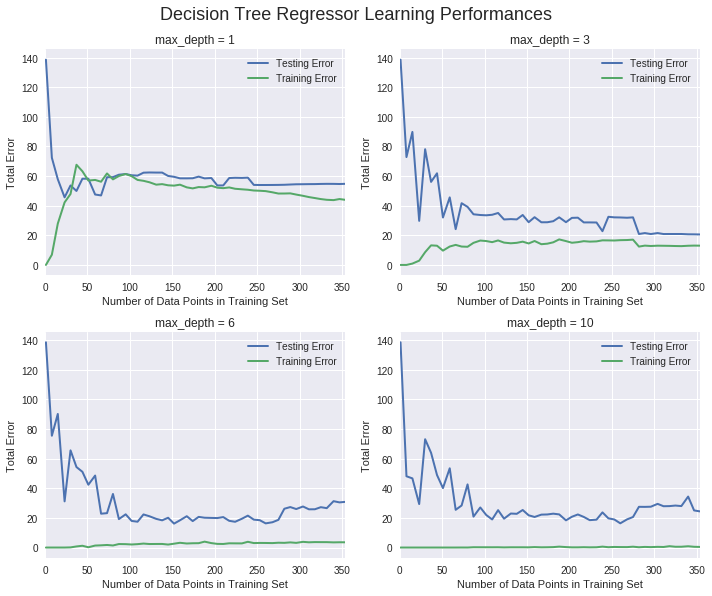

In [15]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: ** I choose the second learning curve. The max depth for it is 3. As the size of the training set increases, training error slightly increases. As the size of the training set increases, test error decreases significantly. At the end, there is a small gap between training error and test error (converges).

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: ** When the model is using the full training set, it suffers from high bias when the max depth is 1. At max depth of 1, the training and test errors converge and the errors are high. Training error initially goes up and then plateau as the no of data points increases. Test error initially decreases and then plateau as the no of data points increases. This means that the model suffers from high bias. In this case, the model is less complex. If the model does not represent the complexity adequately, then it will suffer from high bias. It suffers from high variance when max depth is 10. At max depth of 10, there is a huge gap between the training and test errors. In this case, the training error is very low (almost negligible) and the test error is high compared to training error. This means that model suffers from high variance. If the model is too complex, then the variability increases. 

Creating a model complexity graph. . . 


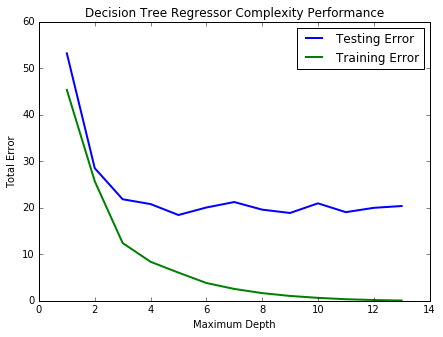

In [0]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: ** Initially, the training and test errors decreases as the max depth increases. After a certain point (depth 5), the training error decreases further but test error starts plateauing or slightly increasing. Initially the model suffers from  high bias. As the max depth increases to maximum, the model suffers from high variance. Max depth of 5 results in a model that best generalizes the dataset. This is because at max depth of 5, the test error is minimum. The model with depth 5 is the one which generalizes better and has the lowest complexity. After depth 5, noise is added to the test error i.e test error starts plateauing or slightly increasing.

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [0]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 5


**Answer: ** The optimal max_depth for the model is 5. This result matches my initial intution. Initially the model suffers from high bias. As the max depth increases to maximum, the model suffers from high variance. Max depth of 5 results in a model that best generalizes the dataset. This is because at max depth of 5, the test error is minimum and also the gap between training and testing error (converges) is less compared to the gap at max depth of 12 (high variance).


## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [0]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 21.630


**Answer: ** The best selling price for the client's home is 20.968. The mean housing price is 22.533. The best selling price for the client's home is 1.565 less than the mean. The median housing price is 21.2. The best selling price for the client's home is 0.232  less than the median. Therefore the best selling price for the client's home is slightly less than the median and mean. Standard deviation of house price is 9.188. Therefore the best selling price for the client's home is within one standard deviation (9.188) of the Mean (22.533). 

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: ** I would use this model to predict the selling price of future client's homes in the Greater Boston Area. We have a decent model that predicts the housing prices. My initial intution for the max depth matched the one provided by the GridSearchCV. I have confidence in this model because we have visually verified the model using matplotlib. Also the best selling price for the client's home was adequately justified by the calculated statistics. e.g within one standard deviation of the mean and slightly less than mean and median.

In [0]:
from sklearn.neighbors import NearestNeighbors
def find_nearest_neighbor_indexes(x, X):  # x is your vector and X is the data set.
   neigh = NearestNeighbors( n_neighbors = 10 )
   neigh.fit( X)
   distance, indexes = neigh.kneighbors( x )
   return indexes
x = CLIENT_FEATURES
X = housing_features
indexes = find_nearest_neighbor_indexes(x, X)
sum_prices = []
for i in indexes:
    sum_prices.append(city_data.target[i])
neighbor_avg = np.mean(sum_prices)
print "Nearest Neighbors average: " + str(neighbor_avg)

Nearest Neighbors average: 21.52
